In [1]:
%display plain
#%display latex

In [2]:
from matplotlib import cm
from itertools import product

In [3]:
var('r,t,theta,phi,x,y,z')
assume(x,'real')
assume(y,'real')
assume(z,'real')
assume(r,'real')
assume(t,'real')
assume(theta,'real')
assume(phi,'real')

In [4]:
m1 = matrix([[0,1,0,0],
             [1,0,0,0],
             [0,0,1,0],
             [0,0,0,1]])

m2 = matrix([[0,1,0,0],
             [0,0,1,0],
             [1,0,0,0],
             [0,0,0,1]])

m3 = matrix([[0,1,0,0],
             [0,0,1,0],
             [0,0,0,1],
             [1,0,0,0]])

refl = matrix([[-1, 0, 0, 0],
               [ 0,-1, 0, 0],
               [ 0, 0,-1, 0],
               [ 0, 0, 0,-1]])

In [5]:
com = vector([1,1,1,1])/sqrt(4)

u = vector(QQ,[1,0,0,0])
v = vector(QQ,[0,1,0,0])
w = vector(QQ,[0,0,1,0])

u = u - (u*com)*com/com.norm()^2
v = v - (v*com)*com/com.norm()^2
w = w - (w*com)*com/com.norm()^2

v = v - (v*u)*u/u.norm()^2
w = w - (w*u)*u/u.norm()^2

w = w - (w*v)*v/v.norm()^2

u = u/u.norm()
v = v/v.norm()
w = w/w.norm()


In [6]:
Pm = matrix([com,u,v,w]).transpose()

Qm = matrix([[0,0,0],
             [1,0,0],
             [0,1,0],
             [0,0,1]])

s1 = Qm.transpose()*Pm^-1*m1*Pm*Qm
s2 = Qm.transpose()*Pm^-1*m2*Pm*Qm
s3 = Qm.transpose()*Pm^-1*m3*Pm*Qm
srefl = Qm.transpose()*Pm^-1*refl*Pm*Qm

assert s1^2 == identity_matrix(3)
assert s2^3 == identity_matrix(3)
assert s3^4 == identity_matrix(3)

In [7]:
S4 = [s1^i * s2^j * s3^k for (i,j,k) in product(range(2),range(3),range(4)) ]

S4ext = S4 + [ m*srefl for m in S4]

for m in S4ext:
    m.set_immutable()

print(len(set(m for m in S4)))
print(len(set(m for m in S4ext)))

24
48


In [8]:
M1 = matrix([[1,-1,0,0],[0,1,-1,0]])
M2 = matrix([[1,-1,0,0],[0,1,0,-1]])
M3 = matrix([[1,0,-1,0],[0,0,1,-1]])
M4 = matrix([[0,1,-1,0],[0,0,1,-1]])

#pretty_print(M1,M2,M3,M4)

Pl = matrix([u,v,w]).transpose()

#pretty_print(Pl)

N1 = M1*Pl
N2 = M2*Pl
N3 = M3*Pl
N4 = M4*Pl

w1 = N1.right_kernel().basis_matrix()[0]
w2 = N2.right_kernel().basis_matrix()[0]
w3 = N3.right_kernel().basis_matrix()[0]
w4 = N4.right_kernel().basis_matrix()[0]

w1 = (w1/w1.norm()).simplify_full()
w2 = (w2/w2.norm()).simplify_full()
w3 = (w3/w3.norm()).simplify_full()
w4 = (w4/w4.norm()).simplify_full()

In [9]:
def legendre_poly(n):
    return diff( (x^2-1)^n, x, n)/(2^n*factorial(n))

def assoc_legendre_poly(m,l):
    if m >= 0:
        return (-1)^m * (1-x^2)^(m/2) *diff(legendre_poly(l),x,m)
    else:
        return (-1)^m * factorial(l-m) /factorial(l+m) * assoc_legendre_poly(-m,l)

def real_sh(m,l):
    return r^(l)*cos(m*phi)*assoc_legendre_poly(m,l)(x=cos(theta))

def imag_sh(m,l):
    return r^(l)*sin(m*phi)*assoc_legendre_poly(m,l)(x=cos(theta))

In [10]:
def polar_to_euclid(f):
    return ( f(theta=arccos(z/r)) )(r=sqrt(x^2+y^2+z^2), phi=atan2(y,x))

def symmetry_project(f):
    params = [ M^-1 * vector([x, y, z]) for M in S4ext ]
    f_ave = sum([ f(x=Nm[0],y=Nm[1],z=Nm[2]) for Nm in params ])
    return (f_ave / len(S4ext)).simplify()

def euclid_real(m,l):
    return polar_to_euclid(real_sh(m,l)).simplify()

def euclid_imag(m,l):
    return polar_to_euclid(imag_sh(m,l)).simplify()

def euclid_sym_real(m,l):
    return symmetry_project(euclid_real(m,l)).simplify()

def euclid_sym_imag(m,l):
    return symmetry_project(euclid_imag(m,l)).simplify()

In [11]:
euclid_real(0,2).simplify_full()

-1/2*x^2 - 1/2*y^2 + z^2

In [12]:
for l in [12]: #range(13):
    for m in range(0,l,2):
        val_r = euclid_sym_real(m,l)(x=w1[0],y=w1[1],z=w1[2]).simplify_full()
        val_i = euclid_sym_imag(m,l)(x=w1[0],y=w1[1],z=w1[2]).simplify_full()
        print (m,l), val_r, val_i
        

(0, 12) 174899/746496 0
(2, 12) 611611/186624 -611611/93312*sqrt(2)
(4, 12) 47332285/31104 6761755/7776*sqrt(2)
(6, 12) 2369872505/11664 -515189675/5832*sqrt(2)
(8, 12) 38063200175/5832 15673082425/729*sqrt(2)
(10, 12) -5222644502075/1458 -238377964825/729*sqrt(2)


In [13]:
unnorm_wave_fn = ( euclid_sym_real(0,12) / (174899/746496) - euclid_sym_real(6,12) / (2369872505/11664) ).simplify()

In [14]:
unnorm_wave_fn = ( euclid_sym_real(0,12) / (174899/746496) - euclid_sym_real(2,12) / (611611/186624) ).simplify()

In [15]:
unnorm_wave_fn(x=w1[0],y=w2[1],z=w1[2]).simplify_trig()

0

In [16]:
for n, wi in enumerate([w1,-w1,w2,-w2,w3,-w3,w4,-w4]):
    val = unnorm_wave_fn(x=wi[0],y=wi[1],z=wi[2]).simplify_full()
    assert val == 0, (n, val)
    
for n, wi in enumerate([w1,-w1,w2,-w2,w3,-w3,w4,-w4]):
    val = unnorm_wave_fn(x=wi[0],y=wi[1],z=wi[2]).simplify_full()
    assert val == 0, (n, val)

In [17]:
def euclid_to_sphere(f):
    return f(x=sin(theta)*cos(phi),y=sin(theta)*sin(phi),z=cos(theta))

In [18]:
wv = euclid_to_sphere(unnorm_wave_fn).simplify()

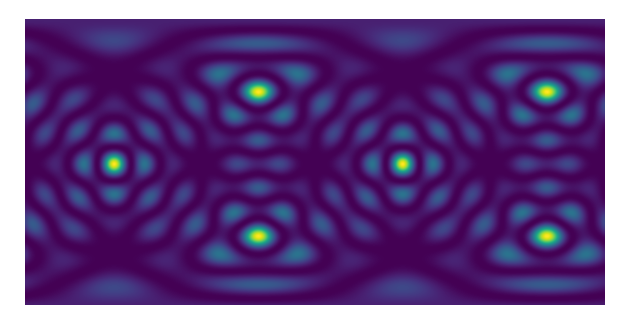

In [19]:
Pmag = density_plot(abs(wv)^2, (phi,-pi,pi), (theta,0,pi), cmap=cm.viridis,
                    plot_points=200,aspect_ratio=1,axes=False)

Pmag.show()

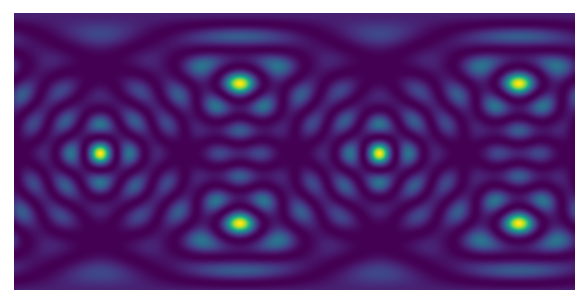

In [20]:
#Pmag.show(transparent=True)
Pmag.show(axes_pad=0,aspect_ratio=1)

In [21]:
def stereographic_proj(v):
    """ Standard Stereographic projection with possible pre-rotation about X, Y and Z axis"""
    w = vector(v)
    return (w[0]/(1-w[2]),w[1]/(1-w[2]))

def to_iso_spherical_coords(v):
    x, y, z = v
    r = sqrt(x^2+y^2+z^2)
    theta = arccos(z/r)
    phi = atan2(y,x)
    return (r,theta,phi)

def to_iso_sphere_coords(v):
    r, theta, phi = to_iso_spherical_coords(v)
    return (phi, theta) #(theta, phi)

In [22]:
P = Graphics()

var('t')

#from itertools import combinations

# the 2-interations
for (wi, wj) in [(-w1,-w2), (-w1,-w3), (-w1,w4), (-w2,-w3), (-w2,w4), (-w3,w4)]:
    three_curve = cos(t)*wi+sin(t)*wj
    three_curve = three_curve/three_curve.norm()
    #two_curve = vector(stereographic_proj(three_curve)).simplify()
    two_curve = vector(to_iso_sphere_coords(three_curve)).simplify()
    if (wi == -w1 or wi == -w2) and wj == -w3:
        P += parametric_plot(two_curve,
                             (t,0,arctan(1/2)-1e-2),
                             thickness=2,
                             color=rainbow(3)[0])
        P += parametric_plot(two_curve,
                             (t,arctan(1/2)+1e-2,pi/2),
                             thickness=2,
                             color=rainbow(3)[0])
    else:
        P += parametric_plot(two_curve,
                             (t,0,pi/2),
                             thickness=2,
                             color=rainbow(3)[0])
        
    if not( wi == -w1 and wj == -w2 ):
        P += parametric_plot(two_curve,
                             (t,pi/2,pi),
                             thickness=2,
                             color=rainbow(3)[1])
    else:
        P += parametric_plot(two_curve,
                             (t,pi/2,3*pi/4-1e-2),
                             thickness=2,
                             color=rainbow(3)[1])
        P += parametric_plot(two_curve,
                             (t,3*pi/4+1e-2,pi),
                             thickness=2,
                             color=rainbow(3)[1])
        
    P += parametric_plot(two_curve,
                         (t,pi,3*pi/2),
                         thickness=2,
                         color=rainbow(3)[2])
    if not( wi == -w1 and wj == -w2 ):
        P += parametric_plot(two_curve,
                             (t,3*pi/2+1e-3,2*pi-1e-3),
                             thickness=2,
                             color=rainbow(3)[1])
    else:
        P += parametric_plot(two_curve,
                             (t,3*pi/2, 7*pi/4-1e-4),
                             thickness=2,
                             color=rainbow(3)[1])
        P += parametric_plot(two_curve,
                             (t,7*pi/4+1e-4,2*pi),
                             thickness=2,
                             color=rainbow(3)[1])
    


P += point(to_iso_sphere_coords( w1), size=120, color='black')
P[-1].set_zorder(10)
P += point(to_iso_sphere_coords(-w1), size=120, color='black')
P[-1].set_zorder(10)

P += point(to_iso_sphere_coords( w2), size=120, color='black')
P[-1].set_zorder(10)
P += point(to_iso_sphere_coords(-w2), size=120, color='black')
P[-1].set_zorder(10)

P += point(to_iso_sphere_coords( w3), size=120, color='black')
P[-1].set_zorder(10)
P += point(to_iso_sphere_coords(-w3), size=120, color='black')
P[-1].set_zorder(10)

P += point(to_iso_sphere_coords( w4), size=120, color='black')
P[-1].set_zorder(10)
P += point(to_iso_sphere_coords(-w4), size=120, color='black')
P[-1].set_zorder(10)

#P.show(aspect_ratio=1,axes=False, fig_tight=True)

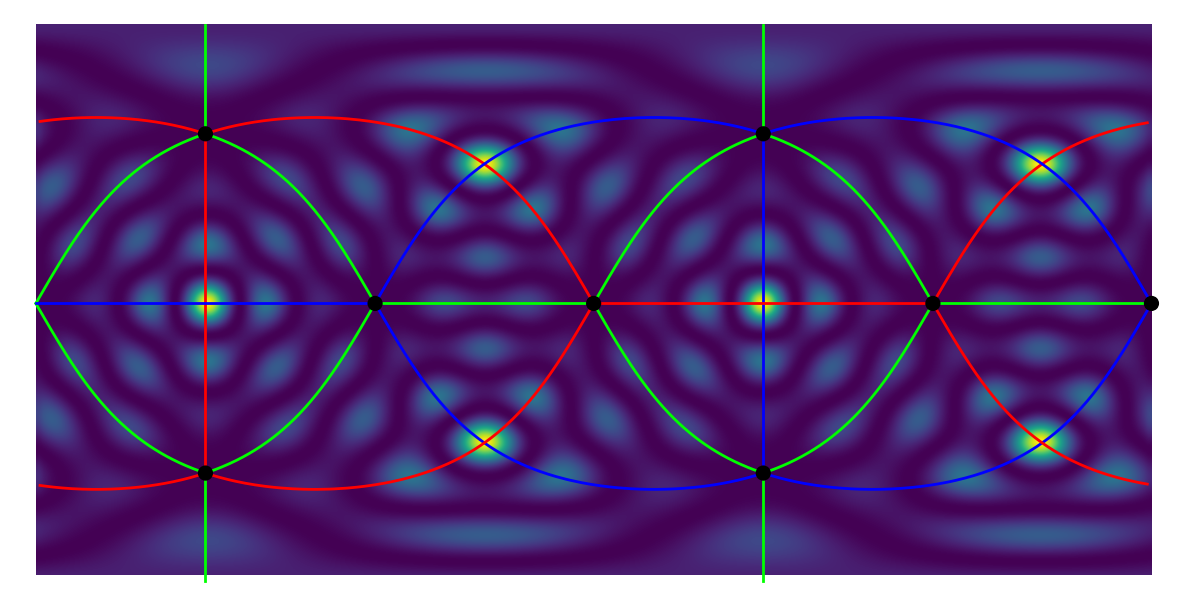

In [23]:
Q_mag = P + Pmag
Q_mag.show(aspect_ratio=1, axes=False, figsize=12, frame=False)

In [34]:
Q_mag.save('wv_prob.pdf',aspect_ratio=1,axes=False, figsize=12, fig_tight=True)

In [ ]:
Q_wv = P + Pwv
Q_wv.show(aspect_ratio=1,axes=False, figsize=12)

In [ ]:
Q_wv.save('wv.pdf',aspect_ratio=1,axes=False, figsize=12)